# 예측 전이학습

## 데이터 다운로드

### 구글 마운트 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/test/flowers_prepared.zip ./

In [ ]:
!unzip flowers_prepared.zip

Archive:  flowers_prepared.zip
   creating: flowers_prepared/test/
   creating: flowers_prepared/test/daisy/
  inflating: flowers_prepared/test/daisy/401.jpg  
  inflating: flowers_prepared/test/daisy/402.jpg  
  inflating: flowers_prepared/test/daisy/403.jpg  
  inflating: flowers_prepared/test/daisy/404.jpg  
  inflating: flowers_prepared/test/daisy/405.jpg  
  inflating: flowers_prepared/test/daisy/406.jpg  
  inflating: flowers_prepared/test/daisy/407.jpg  
  inflating: flowers_prepared/test/daisy/408.jpg  
  inflating: flowers_prepared/test/daisy/409.jpg  
  inflating: flowers_prepared/test/daisy/410.jpg  
  inflating: flowers_prepared/test/daisy/411.jpg  
  inflating: flowers_prepared/test/daisy/412.jpg  
  inflating: flowers_prepared/test/daisy/413.jpg  
  inflating: flowers_prepared/test/daisy/414.jpg  
  inflating: flowers_prepared/test/daisy/415.jpg  
  inflating: flowers_prepared/test/daisy/416.jpg  
  inflating: flowers_prepared/test/daisy/417.jpg  
  inflating: flowers_pre

In [ ]:
# train, test data가 압축이 잘못 해제되었을때
# !mkdir flowers_prepared
# !mv train flowers_prepared/
# !mv test flowers_prepared/

## 데이터 학습 및 예측




31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 25,433,086
Trainable params: 17,664,005
Non

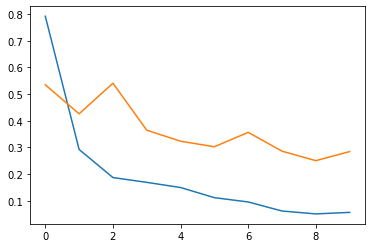

4/4 [==============================] - 1s 107ms/step - loss: 0.2844 - acc: 0.8957
loss= 0.2844425439834595
acc= 0.8957346081733704


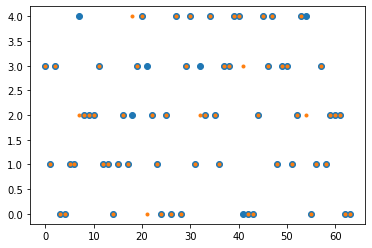

label category index = 3.0
predicted category index = 3
predicted category name = sunflower


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
                                          horizontal_flip=True, vertical_flip=False,
                                          preprocessing_function=preprocessor).flow_from_directory(
                                          "flowers_prepared/train", target_size=(224,224), batch_size=BATCH_SIZE,
                                          class_mode='sparse')

test_data_generator = ImageDataGenerator(preprocessing_function=preprocessor).flow_from_directory(
    "flowers_prepared/test", target_size=(224,224), batch_size=BATCH_SIZE, class_mode='sparse')


history = model.fit(train_data_generator, validation_data=test_data_generator, epochs=10)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

과적합 아님

Epoch = 10 으로 줘서 과적합이 발생한 경우이므로
Epoch 늘리면 해결

## overfitting

위 모델은 과적합 아님 (참고용)

Found 2000 images belonging to 5 classes.
Found 211 images belonging to 5 classes.
Epoch 1/10
32/32 [==============================] - 30s 712ms/step - loss: 5.2703 - acc: 0.7760 - val_loss: 3.5286 - val_acc: 0.8341
Epoch 2/10
32/32 [==============================] - 22s 695ms/step - loss: 2.6105 - acc: 0.8325 - val_loss: 2.5856 - val_acc: 0.8294
Epoch 3/10
32/32 [==============================] - 22s 682ms/step - loss: 2.0636 - acc: 0.8510 - val_loss: 2.4329 - val_acc: 0.7441
Epoch 4/10
32/32 [==============================] - 23s 712ms/step - loss: 1.8972 - acc: 0.8595 - val_loss: 2.0117 - val_acc: 0.8389
Epoch 5/10
32/32 [==============================] - 21s 652ms/step - loss: 1.8607 - acc: 0.8500 - val_loss: 1.9327 - val_acc: 0.8626
Epoch 6/10
32/32 [==============================] - 22s 670ms/step - loss: 1.7529 - acc: 0.8595 - val_loss: 2.4902 - val_acc: 0.7536
Epoch 7/10
32/32 [==============================] - 23s 725ms/step - loss: 1.8072 - acc: 0.8515 - val_loss: 1.8141 - va

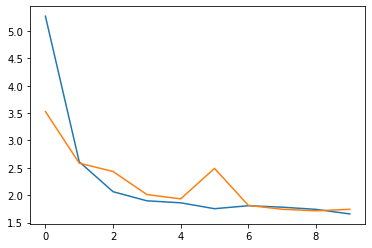

4/4 [==============================] - 1s 103ms/step - loss: 1.7425 - acc: 0.8152
loss= 1.7425317764282227
acc= 0.8151658773422241


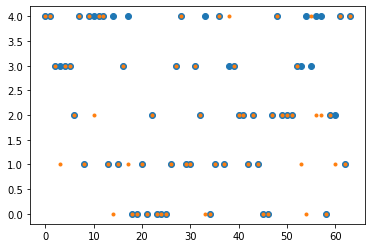

label category index = 4.0
predicted category index = 4
predicted category name = tulip


In [ ]:
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.regularizers import l1, l2, L1L2
# preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = False

# model = models.Sequential()
# model.add(conv_layers)
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_regularizer=l2()))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(5, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

# BATCH_SIZE = 64

# train_data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
#                                           horizontal_flip=True, vertical_flip=False,
#                                           preprocessing_function=preprocessor).flow_from_directory(
#                                           "flowers_prepared/train", target_size=(224,224), batch_size=BATCH_SIZE,
#                                           class_mode='sparse')

# test_data_generator = ImageDataGenerator(preprocessing_function=preprocessor).flow_from_directory(
#     "flowers_prepared/test", target_size=(224,224), batch_size=BATCH_SIZE, class_mode='sparse')

# history = model.fit(train_data_generator,validation_data=test_data_generator, epochs=10)


# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.show()


# loss, acc = model.evaluate(test_data_generator)
# print("loss=", loss)
# print("acc=", acc)



# test_x, test_y = test_data_generator.next()
# y_ = model.predict(test_x)
# predicted = np.argmax(y_, axis=-1)

# plt.plot(test_y[:100], "o")
# plt.plot(predicted[:100], '.')
# plt.show()


# custom_labels = list(test_data_generator.class_indices.keys())
# print("label category index =", test_y[0])
# print("predicted category index =", predicted[0])
# print("predicted category name =", custom_labels[predicted[0]])

## callback

In [ ]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback


class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)  # 출력된 화면 지우고 새로그리기 위함
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

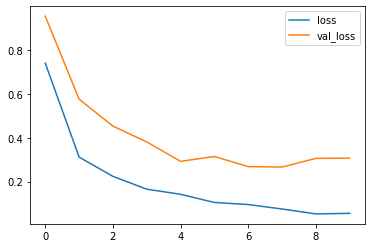

loss =  0.05526203662157059 , val_loss =  0.3072461187839508


In [ ]:
preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
                                          horizontal_flip=True, vertical_flip=False,
                                          preprocessing_function=preprocessor).flow_from_directory(
                                          "flowers_prepared/train", target_size=(224,224), batch_size=BATCH_SIZE,
                                          class_mode='sparse')

test_data_generator = ImageDataGenerator(preprocessing_function=preprocessor).flow_from_directory(
    "flowers_prepared/test", target_size=(224,224), batch_size=BATCH_SIZE, class_mode='sparse')

plot_losses = PlotLosses()

model.fit(train_data_generator, validation_data=test_data_generator, epochs=10, verbose=0, batch_size=BATCH_SIZE, callbacks=[plot_losses])

## callback - 베스트모델 저장

In [ ]:
# 모델 선택. h5파일로 저장
from tensorflow.keras.callbacks import ModelCheckpoint

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True) 
# save_best_only=True인 경우 베스트 모델 저장
# save_best_only=False인 경우 마지막 모델 저장

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_data_generator, validation_data=test_data_generator, epochs=10, verbose=0, batch_size=20, callbacks=[model_check_point])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## 저장된 모델 가져와서 그림그려보기
- VGG 전이학습

In [ ]:
from tensorflow import keras 
mod = keras.models.load_model('/content/best_model.h5')

Found 211 images belonging to 5 classes.


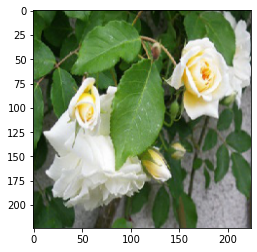

test_y = 2 , predicted = 2


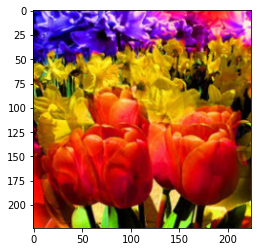

test_y = 4 , predicted = 4


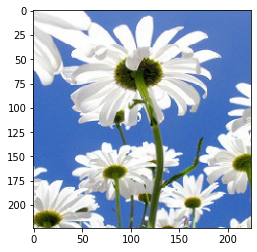

test_y = 0 , predicted = 0


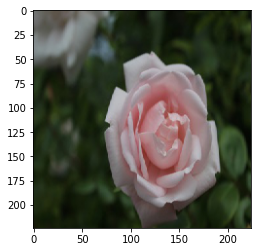

test_y = 2 , predicted = 2


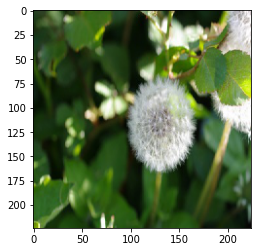

test_y = 1 , predicted = 1


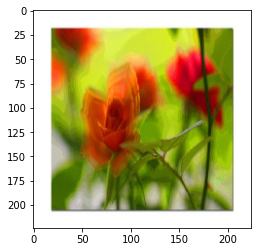

test_y = 2 , predicted = 3


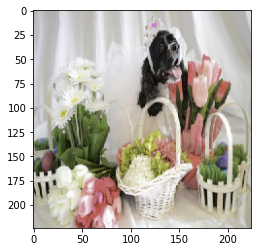

test_y = 4 , predicted = 2


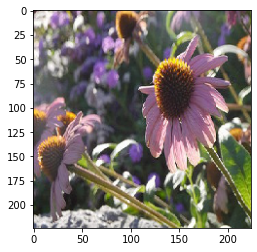

test_y = 0 , predicted = 3


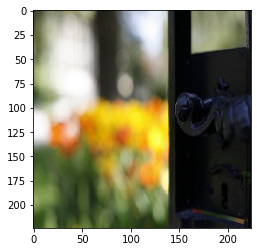

test_y = 4 , predicted = 2


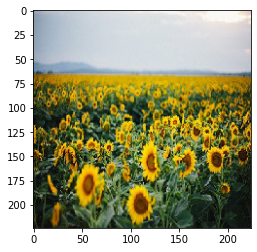

test_y = 3 , predicted = 3


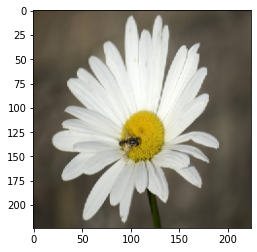

test_y = 0 , predicted = 0


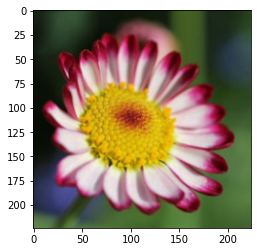

test_y = 0 , predicted = 0


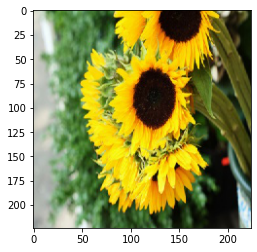

test_y = 3 , predicted = 3


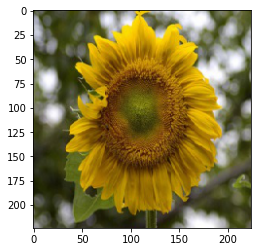

test_y = 3 , predicted = 3


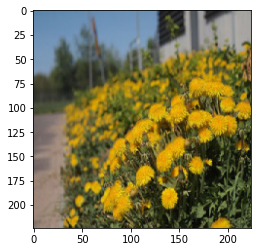

test_y = 1 , predicted = 1


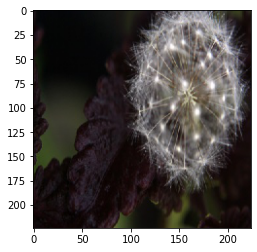

test_y = 1 , predicted = 1


In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "flowers_prepared/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse')


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고
  y_ = mod.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break